In [ ]:
import zipfile
import os

# Replace 'yourfile.zip' with the name of your uploaded zip file
zip_file = "Yolo.zip"
extract_dir = "/content/"  # Directory to extract the files to

# Create directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
try:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"Files extracted to {extract_dir}")
except zipfile.BadZipFile:
    print(f"Error: {zip_file} is a bad zip file (corrupted).")
except OSError as e:
    print(f"Error during extraction: {e}")

# Verify if the files were extracted
if os.path.exists(extract_dir):
    print("Extraction directory exists. Check its contents to confirm successful extraction.")

Files extracted to /content/
Extraction directory exists. Check its contents to confirm successful extraction.


In [ ]:
!pip install ultralytics -q
from ultralytics import YOLO
from IPython.display import display, Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/Yolo/data.yaml epochs=24 plots=True save_period=1 save=True

Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Yolo/data.yaml, epochs=24, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

In [ ]:
!ls runs/detect/train2/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1727157374.e2d2aa9989c9.1261.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch3136.jpg  weights
P_curve.png					    train_batch3137.jpg
PR_curve.png					    train_batch3138.jpg


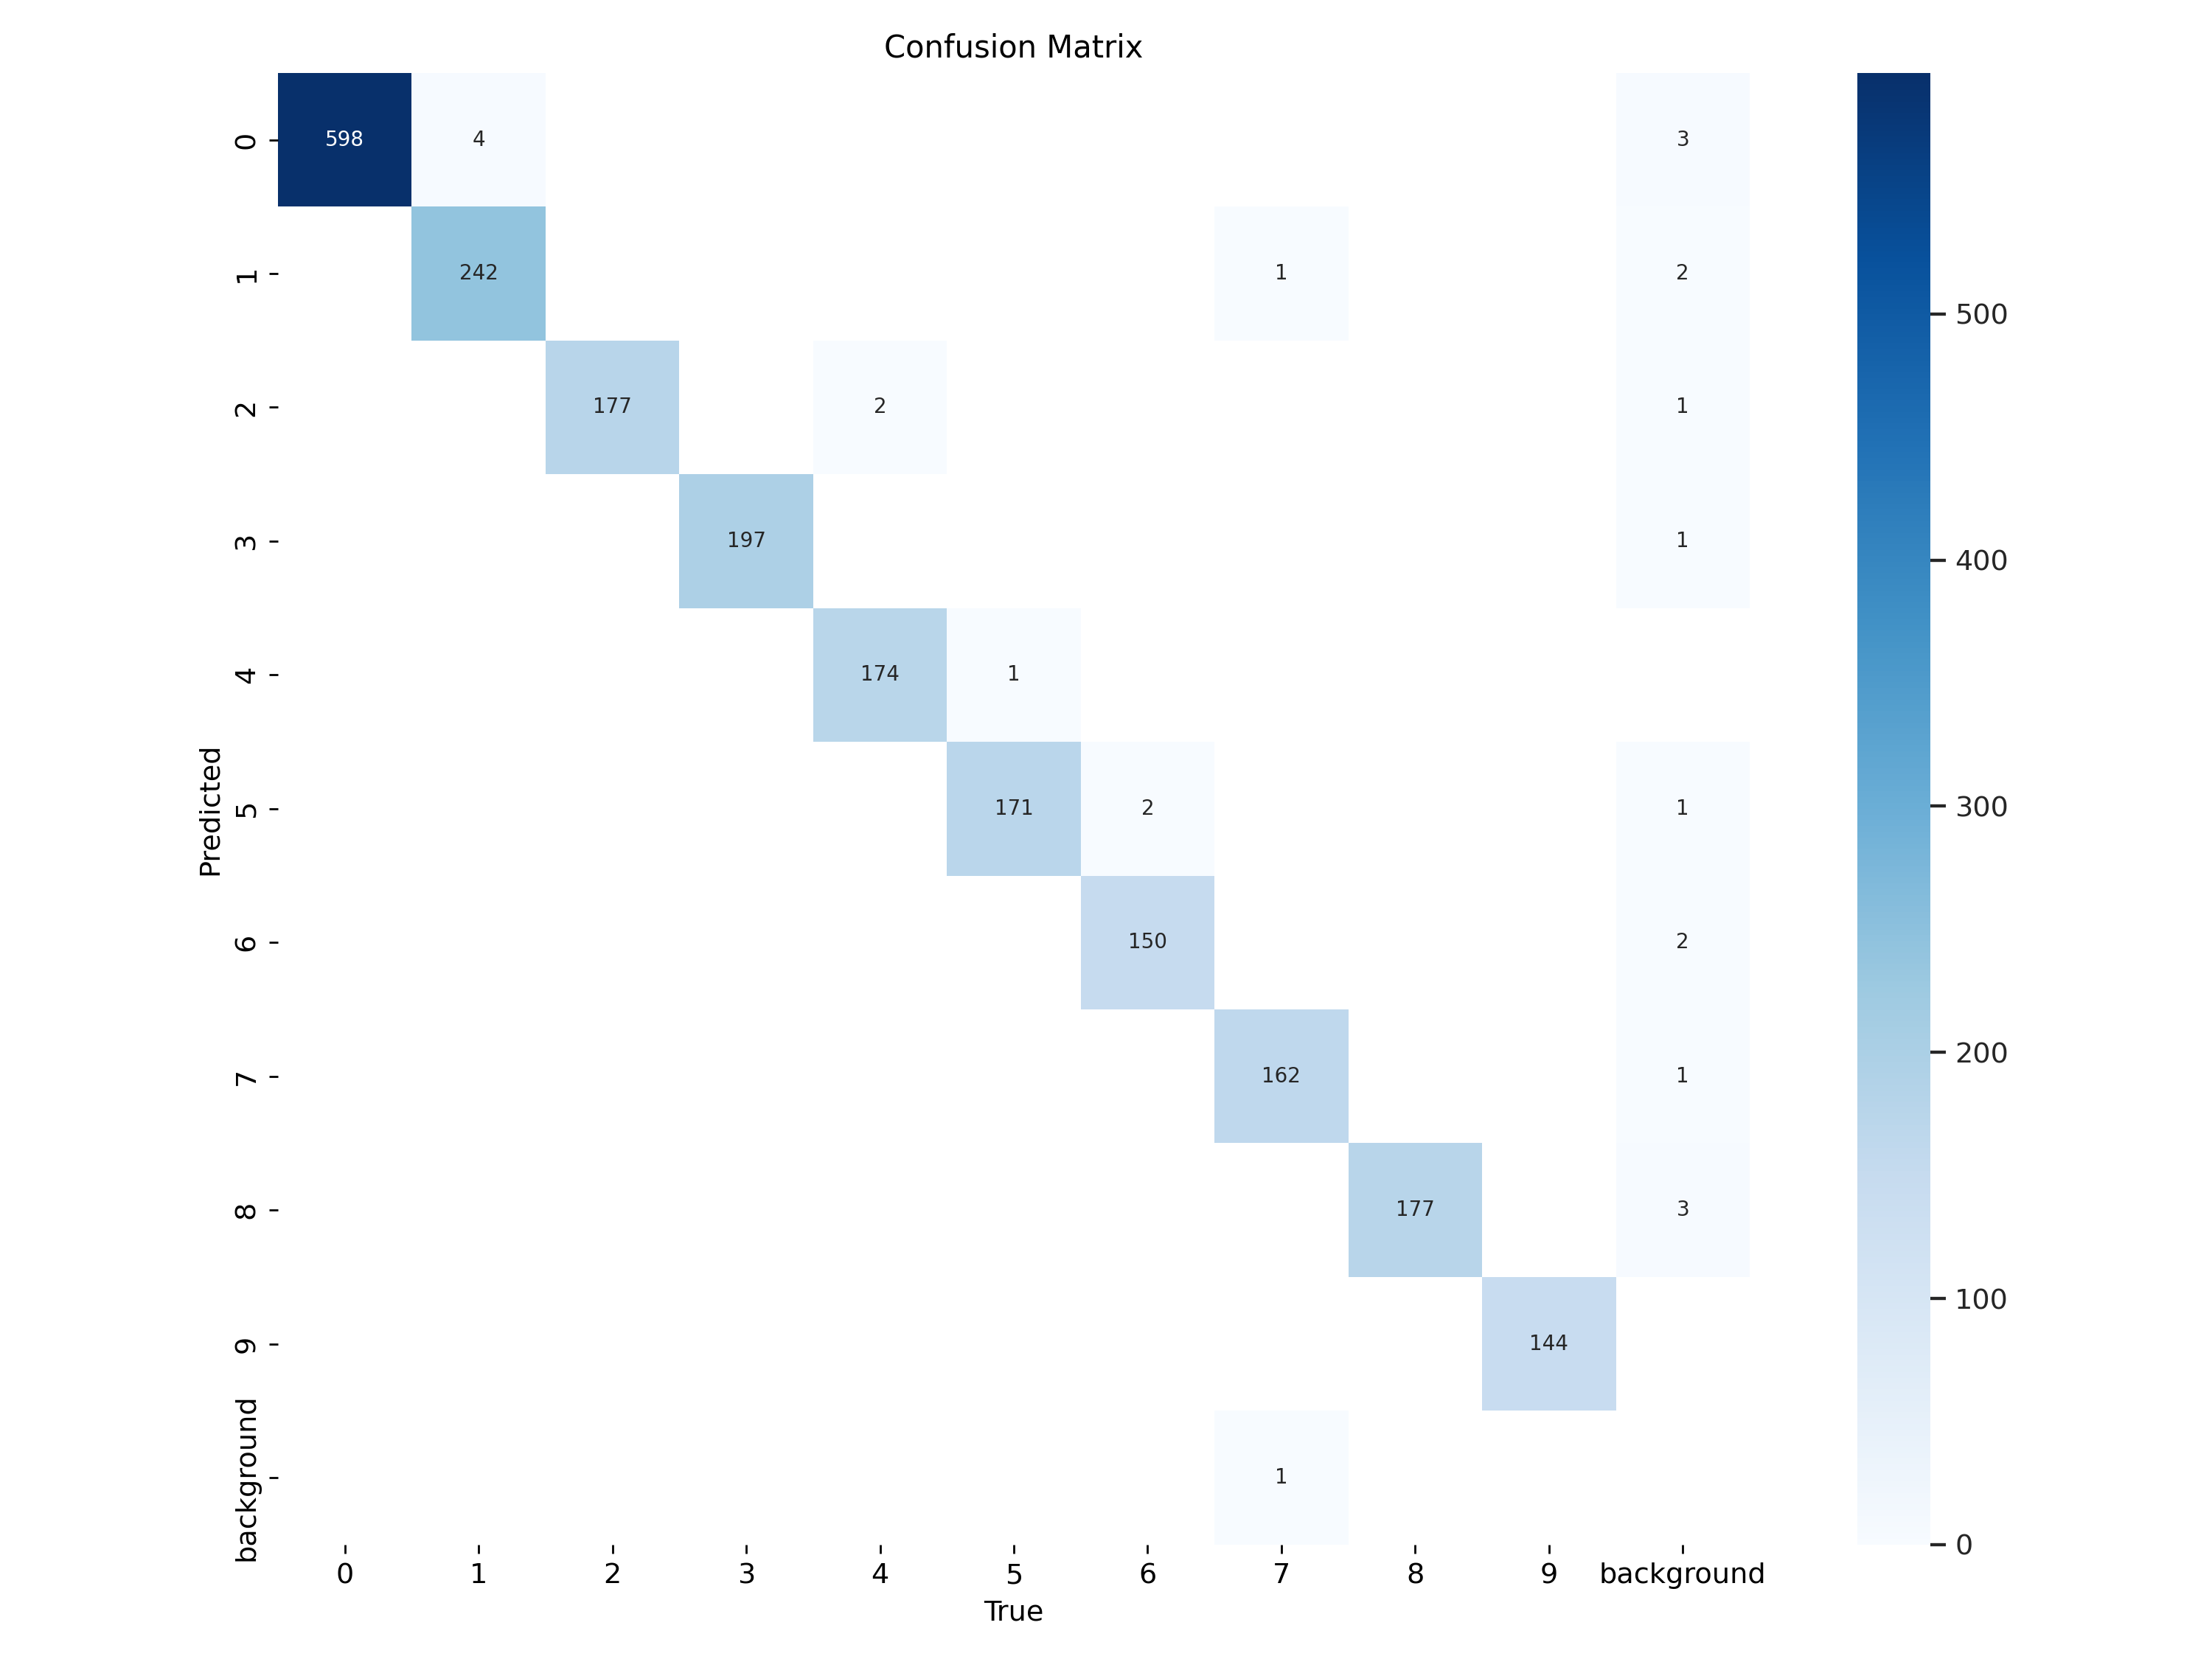

In [ ]:
Image(filename='runs/detect/train2/confusion_matrix.png', width=600)

<IPython.core.display.Image object>


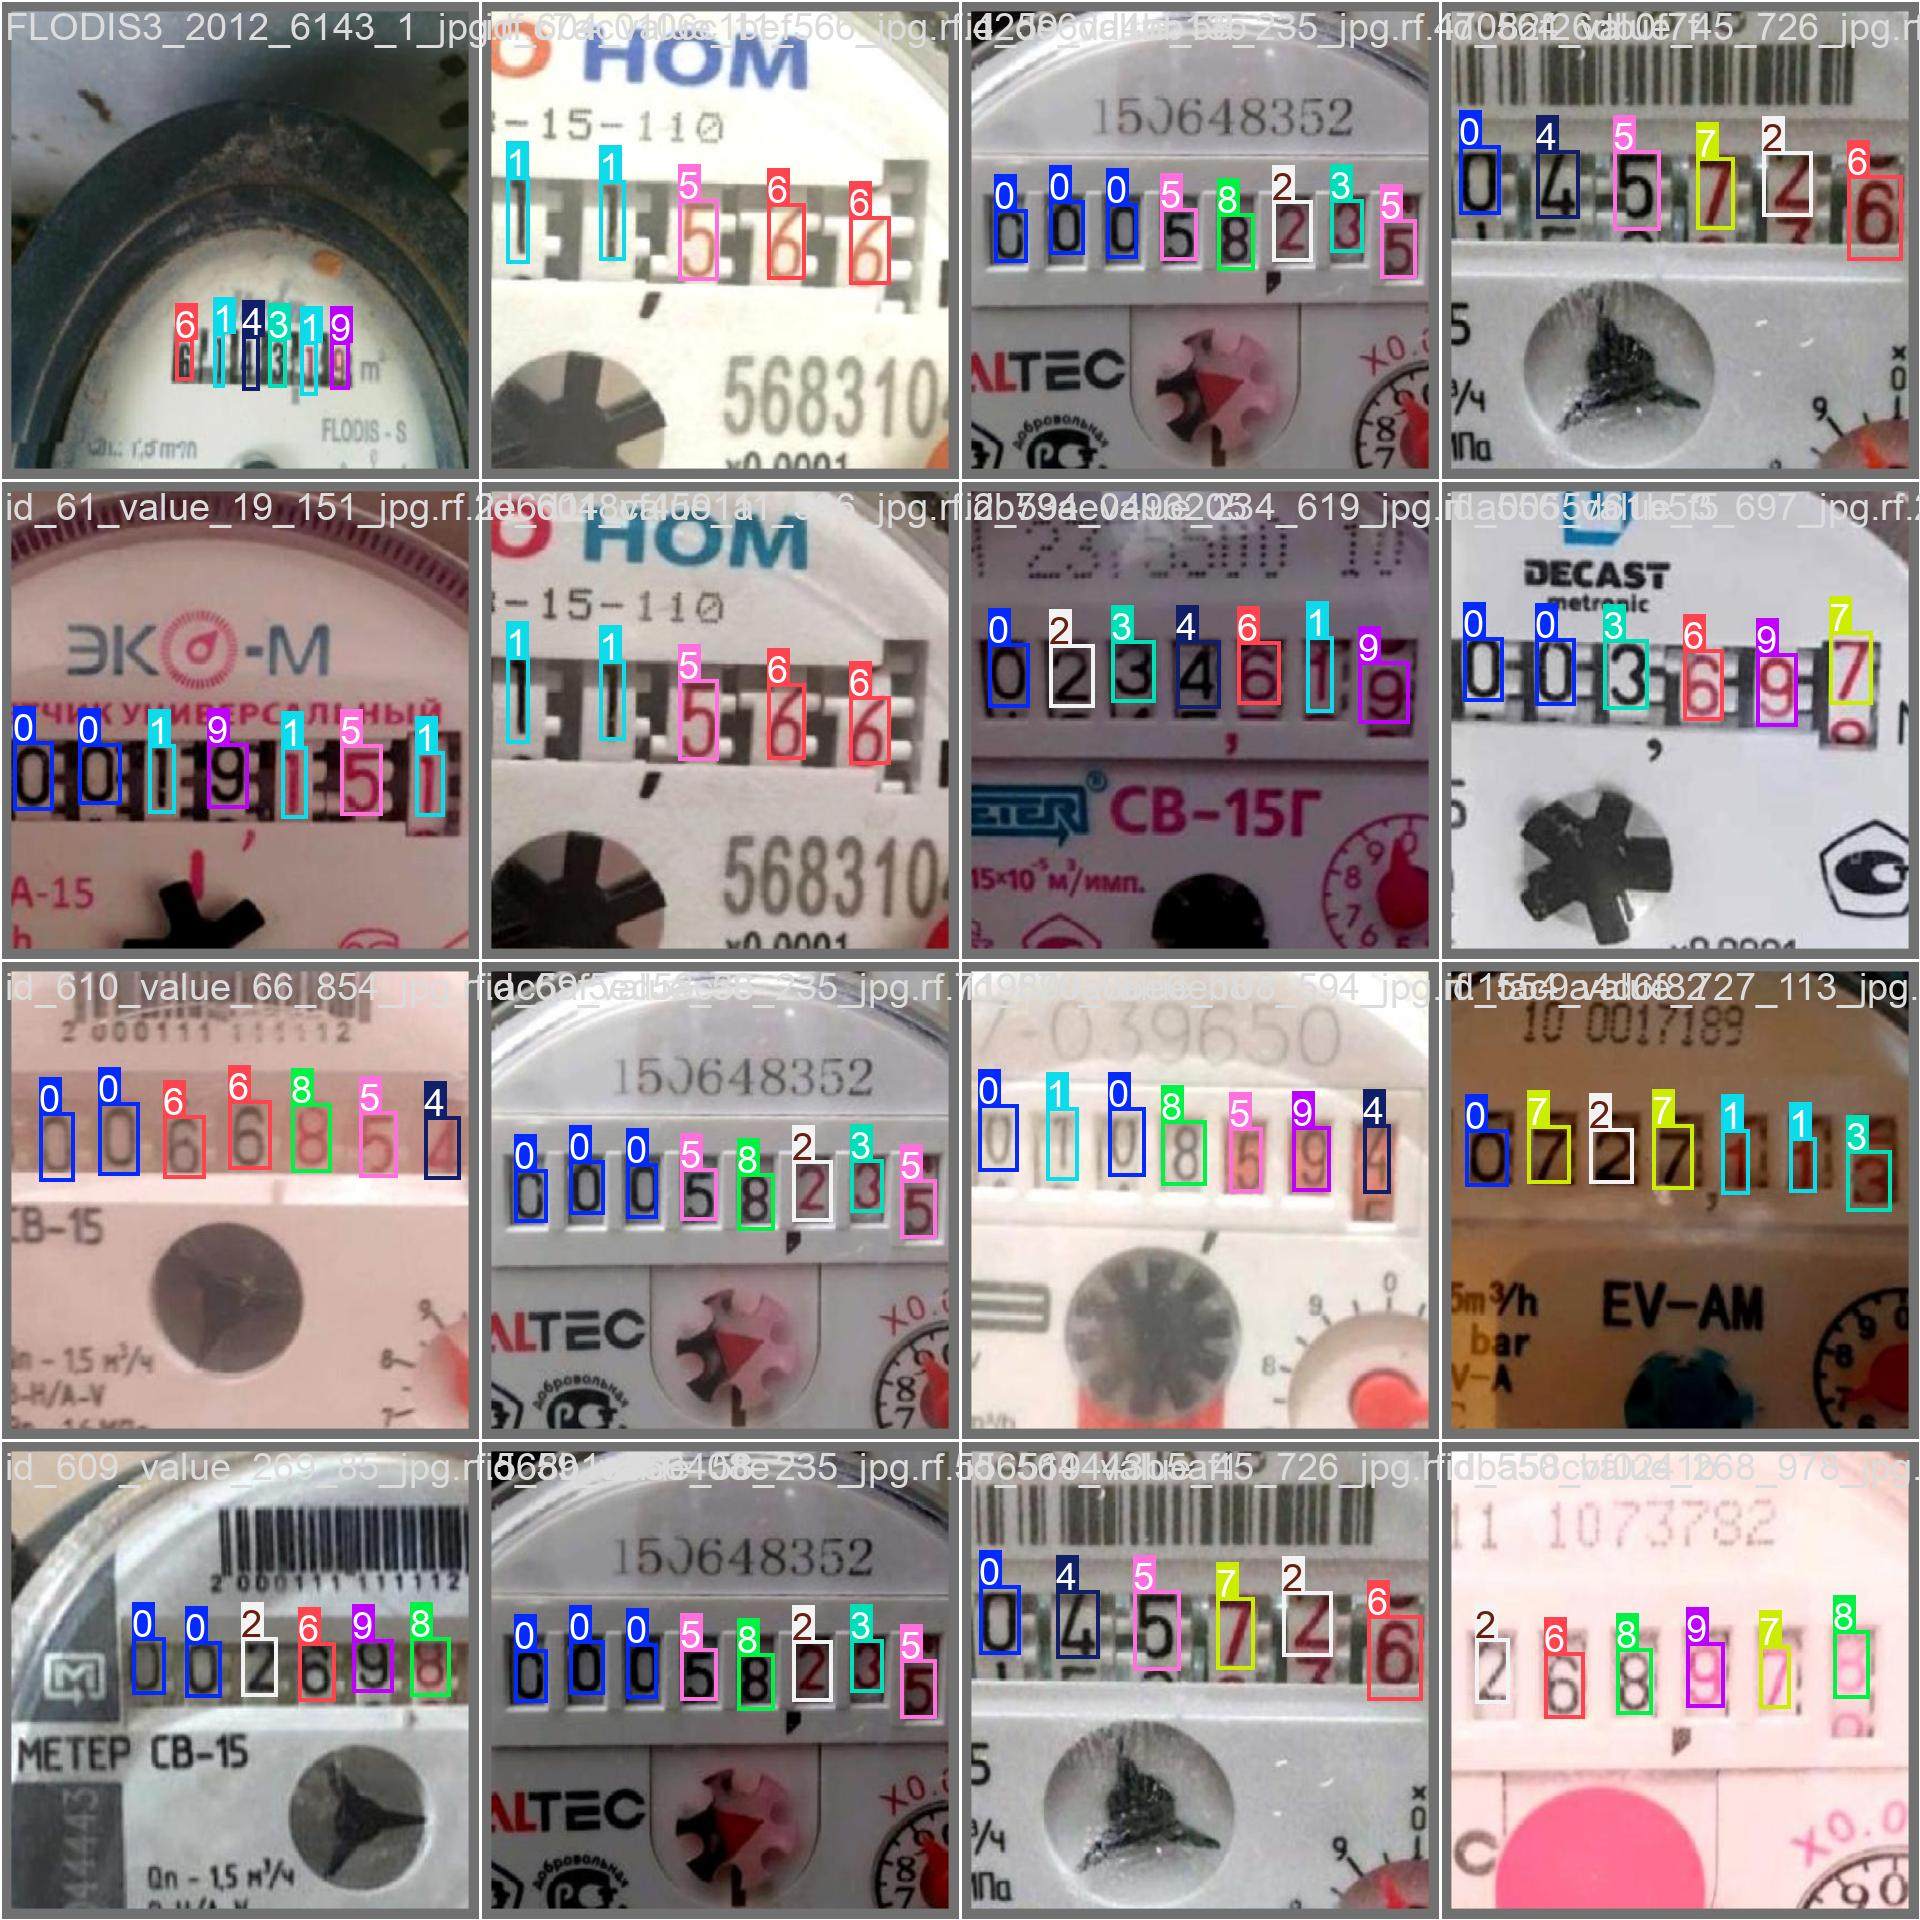

In [ ]:
print(Image(filename='runs/detect/train2/results.png', width=600))
Image(filename='runs/detect/train2/val_batch0_labels.jpg', width=600)

In [ ]:
# !yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=test/images

Ultralytics YOLOv8.2.99 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs

image 1/171 /content/test/images/FLODIS3_2011_6923_1_jpg.rf.d21a174b69331b05b2a5152740ec6fb6.jpg: 640x640 1 2, 1 3, 1 6, 1 7, 1 9, 16.3ms
image 2/171 /content/test/images/FLODIS3_2013_4720_1_jpg.rf.bd8723bbc6790d3884c84e33939cc6e3.jpg: 640x640 1 0, 1 1, 2 2s, 1 4, 1 7, 16.4ms
image 3/171 /content/test/images/id_1001_value_1113_124_jpg.rf.5767562b41761c2dd1a31ba4ee34968f.jpg: 640x640 1 0, 4 1s, 1 2, 1 3, 1 4, 16.2ms
image 4/171 /content/test/images/id_1003_value_209_317_jpg.rf.f0455a0e1eb429b01a05303e88cf78bf.jpg: 640x640 3 0s, 1 1, 1 2, 1 3, 1 7, 1 9, 16.2ms
image 5/171 /content/test/images/id_1009_value_133_679_jpg.rf.83a30d4cc9854368b182479ac18f6ce9.jpg: 640x640 2 0s, 1 1, 2 3s, 1 6, 1 7, 1 9, 16.2ms
image 6/171 /content/test/images/id_1011_value_567_0_jpg.rf.66e2a15dc8e18e9a68d1a1863ac6d61e.jpg: 640x640 2 0s, 1 5, 

In [ ]:
# Load a model
model = YOLO("yolov8s.pt")  # load an official model
model = YOLO("runs/detect/train/weights/best.pt")  # load a custom model

FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/train/weights/best.pt'

In [ ]:
# !yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=/content/grayscale_image.jpg

Ultralytics YOLOv8.2.99 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/grayscale_image.jpg: 640x640 2 0s, 1 3, 2 5s, 1 9, 16.3ms
Speed: 5.0ms preprocess, 16.3ms inference, 925.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
image_path = '/content/image'

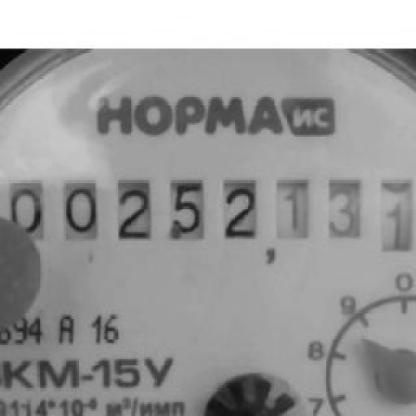

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread(image_path)

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
cv2_imshow(gray_img)
# Save the image
# Assuming 'gray_img' is the image you want to save
cv2.imwrite('/content/image_r.jpg', gray_img)

# Display the saved image (optional)
saved_img = cv2.imread('/content/grayscale_image.jpg')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the trained model
model = YOLO('runs/detect/train2/weights/best.pt')

# Define the path to the image you want to detect objects in
image_path = '/content/rotated_image.jpg'

# Run inference
results = model(image_path)


image 1/1 /content/rotated_image.jpg: 640x640 2 0s, 2 1s, 2 2s, 1 3, 1 5, 16.3ms
Speed: 3.3ms preprocess, 16.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


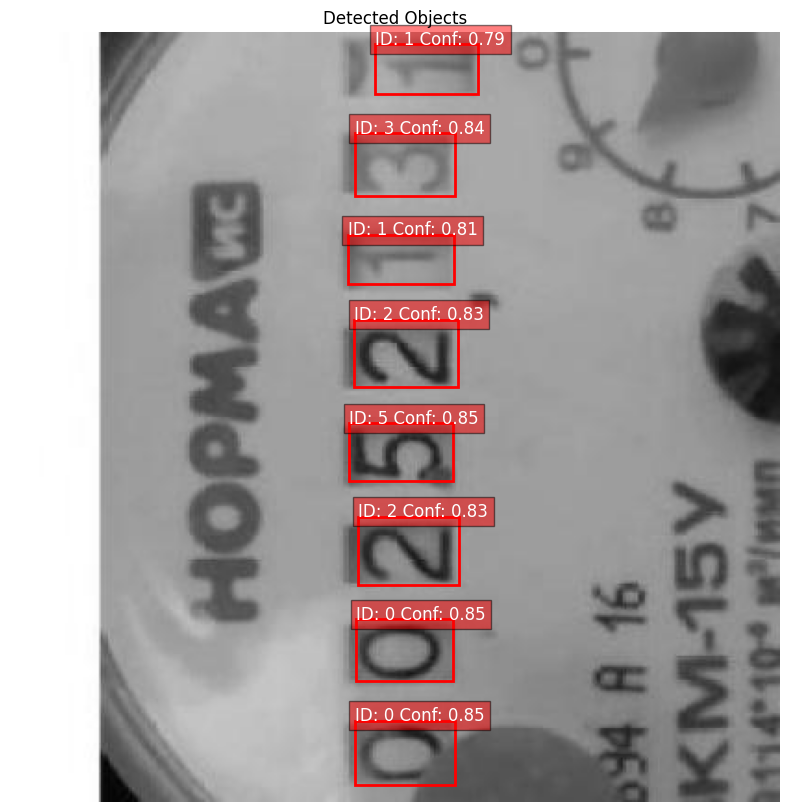

In [ ]:
# Display the image
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')

# Draw bounding boxes and display detected numbers
for result in results:
    boxes = result.boxes  # get bounding boxes
    for box in boxes:
        xyxy = box.xyxy[0].cpu().numpy()  # bounding box coordinates (x1, y1, x2, y2)
        conf = box.conf[0].cpu().numpy()   # confidence score
        cls = box.cls[0].cpu().numpy()     # class ID

        # Draw rectangle
        plt.gca().add_patch(plt.Rectangle(
            (xyxy[0], xyxy[1]),  # Bottom left corner
            xyxy[2] - xyxy[0],   # Width
            xyxy[3] - xyxy[1],   # Height
            fill=False,
            color='red',
            linewidth=2
        ))

        # Display the detected number
        plt.text(
            xyxy[0], xyxy[1],
            f'ID: {int(cls)} Conf: {conf:.2f}',
            color='white',
            fontsize=12,
            bbox=dict(facecolor='red', alpha=0.5)
        )

plt.title("Detected Objects")
plt.show()

In [ ]:
# Collect detected numbers and their coordinates
detected_results = []

for result in results:
    boxes = result.boxes
    for box in boxes:
        cls = box.cls[0].item()  # Class ID
        coordinates = box.xyxy[0].cpu().numpy()  # Get coordinates as a numpy array
        detected_results.append((cls, coordinates))

# Sort detected results based on all coordinates (ascending order)
detected_results.sort(key=lambda x: (x[1][0], x[1][1], x[1][2], x[1][3]))  # Sort by all coordinate values

# Print the sorted results
print("Detected Numbers (Sorted by all coordinates):")
for cls, coords in detected_results:
    print(f"Detected Number: {cls:.1f}, Coordinates: {coords}")

Detected Numbers (Sorted by all coordinates):
Detected Number: 1.0, Coordinates: [     181.89      109.22      239.34      135.61]
Detected Number: 5.0, Coordinates: [     182.74      210.97      238.74      242.27]
Detected Number: 2.0, Coordinates: [     185.37      154.86       241.3      191.25]
Detected Number: 0.0, Coordinates: [     185.72      371.53         240       406.3]
Detected Number: 3.0, Coordinates: [     185.79      54.263       239.8      87.924]
Detected Number: 0.0, Coordinates: [     186.44      316.81      239.06         350]
Detected Number: 2.0, Coordinates: [     187.75      261.46      241.99      298.05]
Detected Number: 1.0, Coordinates: [     196.92      6.1633      252.17      32.822]


In [ ]:
results = model(image_path)

# Loop through detected objects and print class IDs along with their corresponding numbers
for result in results:
    boxes = result.boxes
    for box in boxes:
        cls = box.cls[0].item()  # Get class ID
        print(f"Detected Class ID: {cls}, Detected Number: {int(cls)}")


image 1/1 /content/rotated_image.jpg: 640x640 2 0s, 2 1s, 2 2s, 1 3, 1 5, 16.4ms
Speed: 8.0ms preprocess, 16.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Detected Class ID: 0.0, Detected Number: 0
Detected Class ID: 0.0, Detected Number: 0
Detected Class ID: 5.0, Detected Number: 5
Detected Class ID: 3.0, Detected Number: 3
Detected Class ID: 2.0, Detected Number: 2
Detected Class ID: 2.0, Detected Number: 2
Detected Class ID: 1.0, Detected Number: 1
Detected Class ID: 1.0, Detected Number: 1


In [ ]:
# Initialize an empty string to hold the detected number
detected_number = ""

# Iterate through the results
for result in results:
    boxes = result.boxes
    for box in boxes:
        cls = int(box.cls[0].item())  # Class ID
        detected_number += str(cls)    # Append the detected number

# Print the final detected number
print(f"Detected Number: {detected_number}")

Detected Number: 00532211


In [ ]:
# prompt: write a code to only print and save coordinates of detected number

results = model(image_path)

# Loop through detected objects and print only the coordinates
for result in results:
  boxes = result.boxes
  for box in boxes:
    coordinates = box.xyxy[0].cpu().numpy()  # Get coordinates as a numpy array
    print(f"Coordinates: {coordinates}")

    # Save the coordinates to a file (optional)
    with open("detected_coordinates.txt", "a") as f:
      f.write(f"{coordinates}\n")


image 1/1 /content/rotated_image.jpg: 640x640 2 0s, 2 1s, 2 2s, 1 3, 1 5, 16.4ms
Speed: 3.5ms preprocess, 16.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Coordinates: [     185.72      371.53         240       406.3]
Coordinates: [     186.44      316.81      239.06         350]
Coordinates: [     182.74      210.97      238.74      242.27]
Coordinates: [     185.79      54.263       239.8      87.924]
Coordinates: [     187.75      261.46      241.99      298.05]
Coordinates: [     185.37      154.86       241.3      191.25]
Coordinates: [     181.89      109.22      239.34      135.61]
Coordinates: [     196.92      6.1633      252.17      32.822]


In [ ]:
import numpy as np

# Initialize lists to hold the x and y coordinates
x_coords = []
y_coords = []

# Read the coordinates from the file
with open("detected_coordinates.txt", "r") as f:
    lines = f.readlines()  # Read all lines in the file
    for line in lines:
        if "Coordinates:" in line:
            # Extract the numbers from the line
            coords_str = line.split('Coordinates: ')[1].strip()
            coordinates = np.fromstring(coords_str.strip('[]'), sep=' ')  # Convert to array

            # Append the relevant coordinates to the lists
            x_coords.append(coordinates[0])  # x1
            x_coords.append(coordinates[2])  # x2
            y_coords.append(coordinates[1])  # y1
            y_coords.append(coordinates[3])  # y2

# Calculate the center point
if x_coords and y_coords:  # Check if lists are not empty
    center_x = np.mean(x_coords)  # Average of x coordinates
    center_y = np.mean(y_coords)  # Average of y coordinates
    center_point = (center_x, center_y)
    print(f"Center Point of All Coordinates: {center_point}")
else:
    print("No coordinates found in the file.")

Center Point of All Coordinates: (214.06375000000003, 201.84389375)


In [ ]:
# # Given center point of all coordinates and center of the image
# center_of_coordinates = center_point
# center_of_image = (center_x, center_y)

# # Unpack the coordinates
# x_coord, y_coord = center_of_coordinates
# image_center_x, image_center_y = center_of_image

# # Determine position relative to the center of the image
# if x_coord < image_center_x:
#     horizontal_position = 'Left'
# else:
#     horizontal_position = 'Right'

# if y_coord < image_center_y:
#     vertical_position = 'Top'
# else:
#     vertical_position = 'Bottom'

# # Print the result
# print(f"The detected coordinates are located to the {horizontal_position} and {vertical_position} of the image center.")


In [ ]:
# # Given center point of all coordinates and center of the image
# center_of_coordinates = center_point  # Example coordinates
# center_of_image = (center_x, center_y)  # Example center of the image

# # Unpack the coordinates
# x_coord, y_coord = center_of_coordinates
# image_center_x, image_center_y = center_of_image

# # Determine position relative to the center of the image
# if abs(x_coord - image_center_x) > abs(y_coord - image_center_y):
#     # More deviation in the x-direction (horizontal)
#     if x_coord < image_center_x:
#         position = 'Left'
#     else:
#         position = 'Right'
# else:
#     # More deviation in the y-direction (vertical)
#     if y_coord < image_center_y:
#         position = 'Top'
#     else:
#         position = 'Bottom'

# # Print the result
# print(f"The detected coordinates are located to the {position} of the image center.")


The detected coordinates are located to the Bottom of the image center.


In [ ]:
# Given center point of all coordinates and center of the image
center_of_coordinates = center_point
center_of_image = (center_x, center_y)

# Unpack the coordinates
x_coord, _ = center_of_coordinates  # Only need the x-coordinate for horizontal position
image_center_x, _ = center_of_image  # Only need the x-coordinate for image center

# Determine position relative to the center of the image
if x_coord < image_center_x:
    position = 'Left'
else:
    position = 'Right'

# Print the result
print(f"The detected coordinates are located to the {position} of the image center.")


The detected coordinates are located to the Right of the image center.


The detected coordinates are located to the Right and Top of the image center.


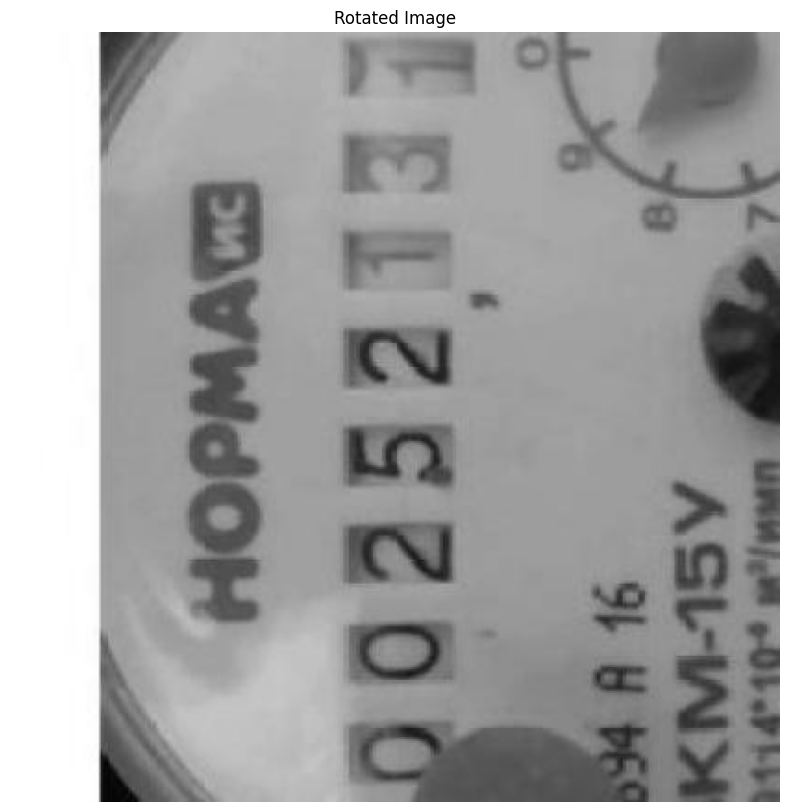

Rotated image saved to /content/rotated_image.jpg.


In [ ]:
# Load the original image
image_path = '/content/image_r.jpg'  # Replace with your image path
img = cv2.imread(image_path)

# Check if the image was loaded correctly
if img is None:
    print(f"Error: Could not load image from {image_path}. Please check the file path and try again.")
else:
  # Get the center of the image
  height, width = img.shape[:2]
  center_x, center_y = width // 2, height // 2

  # Given center point of all coordinates (this should be calculated based on your detected boxes)
  center_of_coordinates = center_point  # Example coordinates
  center_of_image = (center_x, center_y)

  # Unpack the coordinates
  x_coord, y_coord = center_of_coordinates
  image_center_x, image_center_y = center_of_image

  # Determine position relative to the center of the image
  if x_coord < image_center_x:
      horizontal_position = 'Left'
      # Rotate image 90 degrees clockwise
      rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
  elif x_coord > image_center_x:
      horizontal_position = 'Right'
      # Rotate image 90 degrees counterclockwise
      rotated_img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
  else:
      horizontal_position = 'Center'
      rotated_img = img  # No rotation needed

  if y_coord < image_center_y:
      vertical_position = 'Top'
  else:
      vertical_position = 'Bottom'

  # Handle the case when it's in the bottom
  if vertical_position == 'Bottom' and horizontal_position == 'Right':
      # Rotate image 180 degrees
      rotated_img = cv2.rotate(img, cv2.ROTATE_180)

  # Print the result
  print(f"The detected coordinates are located to the {horizontal_position} and {vertical_position} of the image center.")

  # Show the rotated image
  plt.figure(figsize=(10, 10))
  plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
  plt.axis('off')
  plt.title('Rotated Image')
  plt.show()


output_image_path = '/content/rotated_image.jpg'  # Specify your output path
cv2.imwrite(output_image_path, rotated_img)
print(f"Rotated image saved to {output_image_path}.")

In [ ]:
import zipfile
import os

def zip_folder(folder_path, zip_path):
  with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, _, files in os.walk(folder_path):
      for file in files:
        file_path = os.path.join(root, file)
        arcname = os.path.relpath(file_path, folder_path)
        zipf.write(file_path, arcname)

# Example usage:
folder_to_zip = '/content/runs'  # Replace with the actual folder path
zip_file_name = 'runs.zip'

zip_folder(folder_to_zip, zip_file_name)
print(f"Folder '{folder_to_zip}' zipped to '{zip_file_name}'")

Folder '/content/runs' zipped to 'runs.zip'


In [ ]:
import zipfile
import os

# Replace 'yourfile.zip' with the name of your uploaded zip file
zip_file = "Yolo.zip"
extract_dir = "/content/"  # Directory to extract the files to

# Create directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
try:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"Files extracted to {extract_dir}")
except zipfile.BadZipFile:
    print(f"Error: {zip_file} is a bad zip file (corrupted).")
except OSError as e:
    print(f"Error during extraction: {e}")

# Verify if the files were extracted
if os.path.exists(extract_dir):
    print("successful extraction.")

Files extracted to /content/
successful extraction.


In [ ]:
!pip install ultralytics -q

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow

from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
img_path = '/content/2.png'

In [ ]:
# Load the trained model
model = YOLO('detect/train2/weights/best.pt')

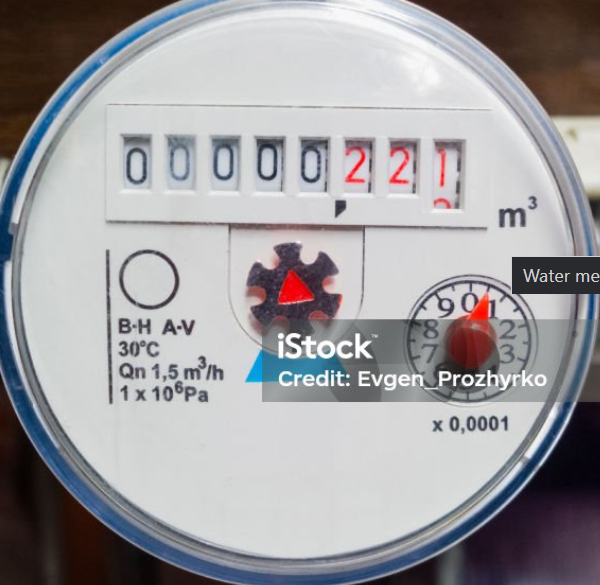

In [ ]:
img = cv2.imread(img_path)
cv2_imshow(img)

In [ ]:
results = model(img_path)


image 1/1 /content/2.png: 640x640 5 0s, 1 1, 2 2s, 1383.9ms
Speed: 5.1ms preprocess, 1383.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


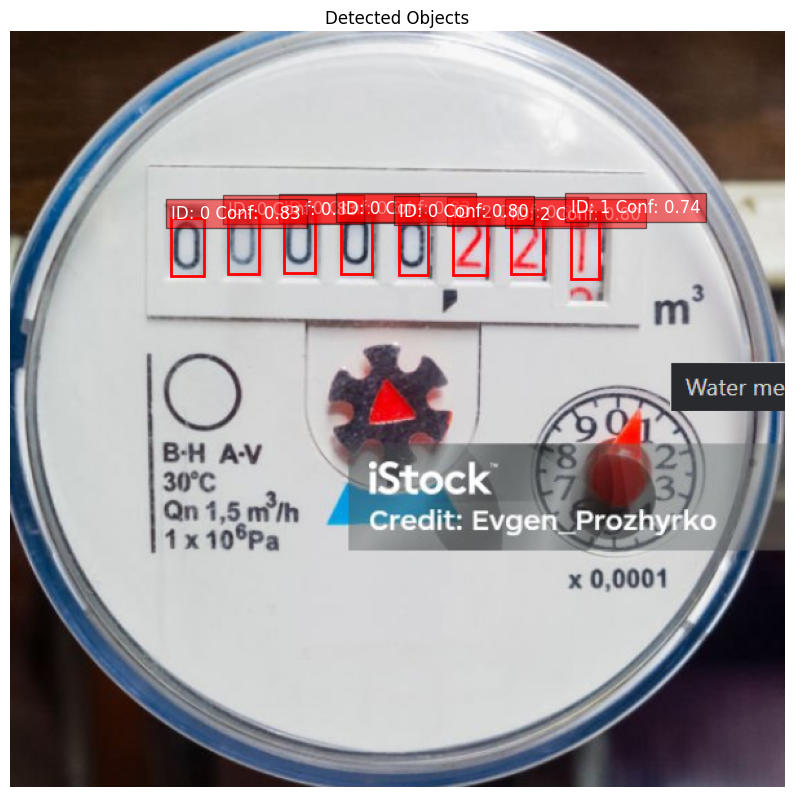

In [ ]:
# Display the image
img = mpimg.imread(img_path)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')

# Draw bounding boxes and display detected numbers
for result in results:
    boxes = result.boxes  # get bounding boxes
    for box in boxes:
        xyxy = box.xyxy[0].cpu().numpy()  # bounding box coordinates (x1, y1, x2, y2)
        conf = box.conf[0].cpu().numpy()   # confidence score
        cls = box.cls[0].cpu().numpy()     # class ID

        # Draw rectangle
        plt.gca().add_patch(plt.Rectangle(
            (xyxy[0], xyxy[1]),  # Bottom left corner
            xyxy[2] - xyxy[0],   # Width
            xyxy[3] - xyxy[1],   # Height
            fill=False,
            color='red',
            linewidth=2
        ))

        # Display the detected number
        plt.text(
            xyxy[0], xyxy[1],
            f'ID: {int(cls)} Conf: {conf:.2f}',
            color='white',
            fontsize=12,
            bbox=dict(facecolor='red', alpha=0.5)
        )

plt.title("Detected Objects")
plt.show()

In [ ]:
# Initialize a list to collect detected numbers and their coordinates
detected_results = []

# Loop through the detection results and extract class IDs (numbers) and their coordinates
for result in results:
    boxes = result.boxes
    for box in boxes:
        cls = box.cls[0].item()  # Detected class (number)
        coordinates = box.xyxy[0].cpu().numpy()  # Extract coordinates as a numpy array

        # Append detected number (class) and coordinates as a tuple to the list
        detected_results.append((cls, coordinates))

# Sort the detected results based on the coordinate values (x1, y1, x2, y2)
# Sorting is based on the first (x1), then (y1), (x2), and finally (y2)
detected_results.sort(key=lambda x: (x[1][0], x[1][1], x[1][2], x[1][3]))

# Print the sorted detected numbers along with their coordinates
print("Detected Numbers (Sorted by all coordinates):")
for cls, coords in detected_results:
    print(f"Detected Number: {cls:.1f}, Coordinates: {coords}")


Detected Numbers (Sorted by all coordinates):
Detected Number: 0.0, Coordinates: [     124.48      144.19      149.51      189.23]
Detected Number: 0.0, Coordinates: [     168.54      140.97      191.97      187.05]
Detected Number: 0.0, Coordinates: [     211.68      140.27      235.95      186.93]
Detected Number: 0.0, Coordinates: [     255.84      140.02      279.86      187.13]
Detected Number: 0.0, Coordinates: [     300.71      142.17      322.96      188.07]
Detected Number: 2.0, Coordinates: [     342.16      143.19      369.04         188]
Detected Number: 2.0, Coordinates: [     387.28      144.63      411.76      187.43]
Detected Number: 1.0, Coordinates: [     433.64      139.54      455.75      191.04]


In [ ]:
print(detected_number)

00002201


In [ ]:
# Collect detected numbers and their coordinates
detected_results = []

for result in results:
    boxes = result.boxes
    for box in boxes:
        cls = box.cls[0].item()  # Class ID
        coordinates = box.xyxy[0].cpu().numpy()  # Get coordinates as a numpy array
        detected_results.append((cls, coordinates))

# Sort detected results based on all coordinates (ascending order)
detected_results.sort(key=lambda x: (x[1][0], x[1][1], x[1][2], x[1][3]))  # Sort by all coordinate values

# Print the sorted results
print("Detected Numbers (Sorted by all coordinates):")
for cls, coords in detected_results:
    print(f"Detected Number: {cls:.1f}, Coordinates: {coords}")

Detected Numbers (Sorted by all coordinates):
Detected Number: 0.0, Coordinates: [     259.13      175.01      276.19      217.02]
Detected Number: 4.0, Coordinates: [     288.53      173.61      305.05      215.67]
Detected Number: 7.0, Coordinates: [     288.62      175.22      303.28      215.41]
Detected Number: 3.0, Coordinates: [     316.93      175.76      333.48      215.56]
Detected Number: 2.0, Coordinates: [     346.32      173.65      363.72      217.06]
Detected Number: 7.0, Coordinates: [     346.41      174.86       364.4      216.54]
Detected Number: 6.0, Coordinates: [     378.95      173.01      396.07      216.26]
Detected Number: 8.0, Coordinates: [     408.93      172.02      426.34      215.58]
Detected Number: 3.0, Coordinates: [      409.4      172.93      427.48      215.64]
Detected Number: 7.0, Coordinates: [     439.85      171.36      458.47      215.11]
Detected Number: 8.0, Coordinates: [      471.1      169.73      491.14      215.46]


In [ ]:
# Loop through detected objects and print only the coordinates
for result in results:
    boxes = result.boxes
    with open("detected_coordinates.txt", "w") as f:  # Open the file in 'write' mode
        for box in boxes:
            coordinates = box.xyxy[0].cpu().numpy()  # Get coordinates as a numpy array
            print(f"Coordinates: {coordinates}")

            # Save the coordinates to the file (this will overwrite each time)
            f.write(f"{coordinates}\n")

In [ ]:
def calculate_center_point(file_path="detected_coordinates.txt"):
    # Initialize lists to hold the x and y coordinates
    x_coords = []
    y_coords = []

    # Read the coordinates from the file
    with open(file_path, "r") as f:
        lines = f.readlines()  # Read all lines in the file
        print("File contents:")
        for line in lines:
            print(line.strip())  # Print each line to check its contents
            if "Coordinates:" in line:  # Check for lines containing "Coordinates:"
                # Extract the numbers from the line
                coords_str = line.split('Coordinates: ')[1].strip()
                coordinates = np.fromstring(coords_str.strip('[]'), sep=' ')  # Convert to array

                # Append the relevant coordinates to the lists
                x_coords.append(coordinates[0])  # x1
                x_coords.append(coordinates[2])  # x2
                y_coords.append(coordinates[1])  # y1
                y_coords.append(coordinates[3])  # y2

    # Calculate the center point if coordinates are found
    if x_coords and y_coords:  # Check if lists are not empty
        center_x = np.mean(x_coords)  # Average of x coordinates
        center_y = np.mean(y_coords)  # Average of y coordinates
        center_point = (center_x, center_y)
        print(f"Center Point of All Coordinates: {center_point}")
    else:
        print("No coordinates found in the file.")

# Example usage
# First, save the detected coordinates
save_coordinates(results)

# Then, calculate the center point
calculate_center_point()

File contents:
No coordinates found in the file.


In [ ]:
import numpy as np

# Initialize lists to hold the x and y coordinates
x_coords = []
y_coords = []

# Read the coordinates from the file
with open("/content/detected_coordinates.txt") as f:
    lines = f.readlines()  # Read all lines in the file
    print("File contents:")
    for line in lines:
        print(line.strip())  # Print each line to check its contents
        if "Coordinates" in line.strip():  # Handle cases with leading/trailing spaces
            # Extract the numbers from the line
            coords_str = line.split('Coordinates: ')[1].strip()
            coordinates = np.fromstring(coords_str.strip('[]'), sep=' ')  # Convert to array

            # Append the relevant coordinates to the lists
            x_coords.append(coordinates[0])  # x1
            x_coords.append(coordinates[2])  # x2
            y_coords.append(coordinates[1])  # y1
            y_coords.append(coordinates[3])  # y2

# Calculate the center point
if x_coords and y_coords:  # Check if lists are not empty
    center_x = np.mean(x_coords)  # Average of x coordinates
    center_y = np.mean(y_coords)  # Average of y coordinates
    center_point = (center_x, center_y)
    print(f"Center Point of All Coordinates: {center_point}")
else:
    print("No coordinates found in the file.")


File contents:
Coordinates: [     188.26      323.12      228.33      350.67]
Coordinates: [     187.51      365.93      230.46      394.01]
Coordinates: [     186.91      236.53         224      265.66]
Coordinates: [     186.21      280.93      230.36      306.34]
Coordinates: [     187.14      194.69      230.02      221.97]
Coordinates: [     184.56       281.5      234.88      307.47]
Center Point of All Coordinates: (208.22, 294.0683333333333)


Centre Of Image

In [ ]:
# Get the dimensions of the image
height, width = img.shape[:2]

# Calculate the center
center_x = width // 2
center_y = height // 2

# Print the center coordinates
print(f"Center of the image: ({center_x}, {center_y})")

Center of the image: (322, 258)


In [ ]:
# Given center point of all coordinates and center of the image
center_of_coordinates = center_point
center_of_image = (center_x, center_y)

# Unpack the coordinates
x_coord, y_coord = center_of_coordinates
image_center_x, image_center_y = center_of_image

# Determine position relative to the center of the image
if x_coord < image_center_x:
    horizontal_position = 'Left'
else:
    horizontal_position = 'Right'

if y_coord < image_center_y:
    vertical_position = 'Bottom'
else:
    vertical_position = 'Top'

# Print the result
print(f"The detected coordinates are located to the {horizontal_position} and {vertical_position} of the image center.")

The detected coordinates are located to the Left and Top of the image center.


In [ ]:
!yolo task=detect mode=val model=detect/train2/weights/best.pt data=/content/Yolo/data.yaml

Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs
100% 755k/755k [00:00<00:00, 14.2MB/s]
val: Scanning /content/Yolo/dataset/valid/labels... 342 images, 0 backgrounds, 0 corrupt: 100% 342/342 [00:00<00:00, 1429.78it/s]
val: New cache created: /content/Yolo/dataset/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 22/22 [04:59<00:00, 13.60s/it]
                   all        342       2203      0.994      0.992      0.994      0.738
                     0        298        598      0.993          1      0.994      0.741
                     1        187        246      0.998      0.984      0.994      0.666
                     2        143        177      0.983          1      0.991       0.76
                     3        151        197          1      0.995      0.995      0.749
                     4     

Overall Metrics:

0.994 precision: The model is highly accurate in predicting object locations and classes.

0.992 recall: It can also identify almost all relevant instances of objects.

0.994 mAP50: Near-perfect at detecting objects with a 0.50 IoU threshold.

0.738 mAP50-95: The model performs well across stricter IoU thresholds, though there's some drop-off compared to mAP50.

Class-wise Performance:

Class 0 through Class 9: Each class's precision, recall, and mAP metrics are shown.

For example:

Class 0 has perfect recall (1.0), while its precision is 0.993.

Class 9 has the highest mAP50-95 (0.771), indicating it's the best-detected class across IoU thresholds.